In [4]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
from sklearn.datasets import fetch_california_housing


In [18]:
housing=fetch_california_housing()

In [22]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [34]:
y=housing.target
x=housing.data

In [37]:
x.shape

(20640, 8)

In [42]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [46]:
x[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [82]:
x_medinc=x[:,0].reshape(-1,1)
x_medinc.shape

(20640, 1)

In [55]:
x_medinc.shape

(20640,)

In [64]:
import matplotlib.pyplot as plt

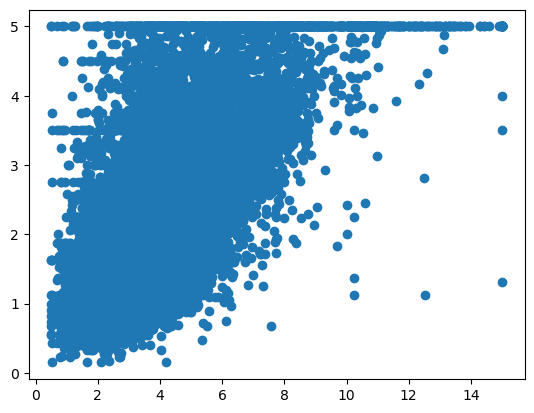

In [67]:
plt.scatter(x_medinc,y)

MedInc
0
[[1.         0.68807521]
 [0.68807521 1.        ]]

HouseAge
1
[[1.         0.10562341]
 [0.10562341 1.        ]]

AveRooms
2
[[1.         0.15194829]
 [0.15194829 1.        ]]

AveBedrms
3
[[ 1.         -0.04670051]
 [-0.04670051  1.        ]]

Population
4
[[ 1.         -0.02464968]
 [-0.02464968  1.        ]]

AveOccup
5
[[ 1.         -0.02373741]
 [-0.02373741  1.        ]]

Latitude
6
[[ 1.         -0.14416028]
 [-0.14416028  1.        ]]

Longitude
7
[[ 1.         -0.04596662]
 [-0.04596662  1.        ]]



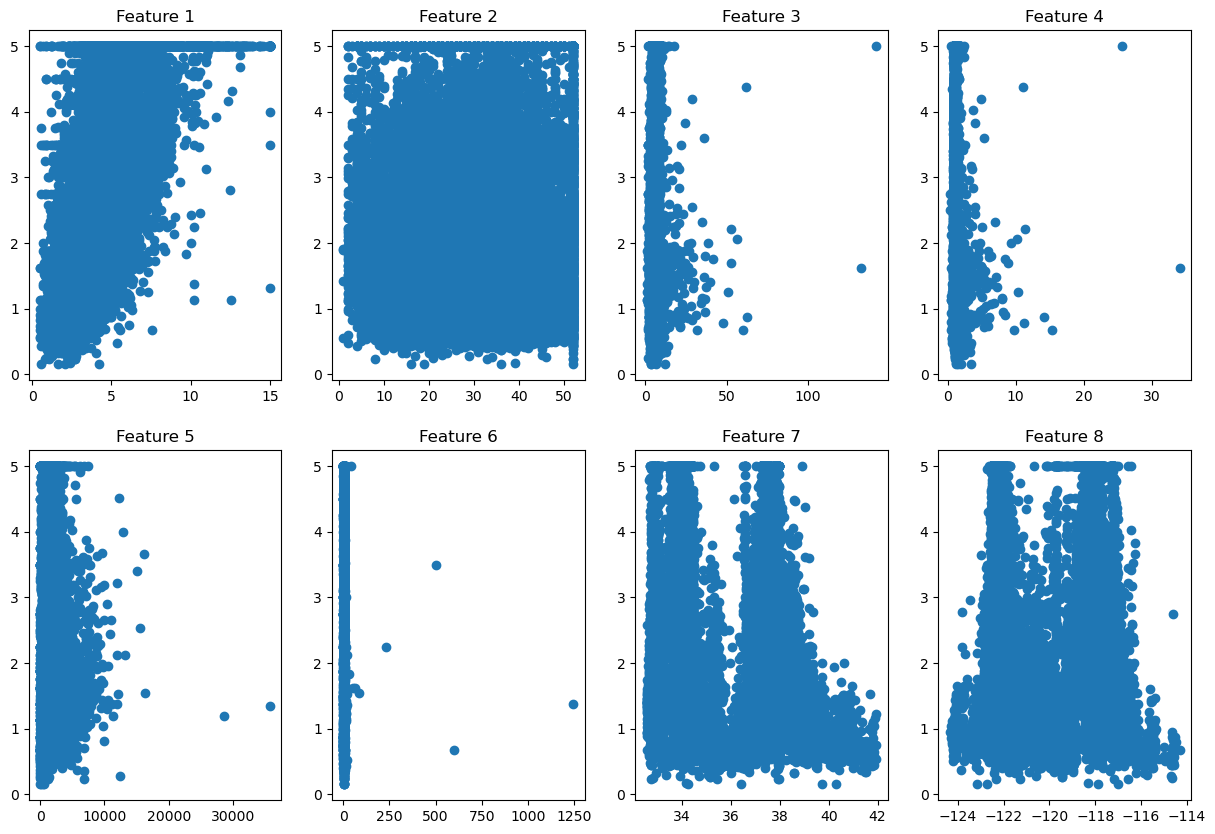

In [76]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()  # Flatten in case it's a 2D array

for i in range(x.shape[1]):
    x_use = x[:, i]
    print(housing.feature_names[i])
    print(i)
    print(np.corrcoef(x_use,y))
    print(str("="*40)+"\n")
    
    axes[i].scatter(x_use, y)
    axes[i].set_title(f"Feature {i+1}")
    

In [94]:
california_model_medinc=LinearRegression()

In [106]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test=train_test_split(x_medinc,y)

In [114]:
y_train.shape

(15480,)

In [116]:
y_test.shape

(5160,)

In [119]:
california_model_medinc.fit(x_train,y_train)

LinearRegression()

In [124]:
y_pred= california_model_medinc.predict(x_test)
r2_score(y_test,y_pred)*100

47.69179856413235

array([1.13027777, 1.17363093, 1.1746266 , ..., 2.87369704, 1.07613818,
       1.70162677])

In [129]:
y_test

array([3.761, 1.375, 0.675, ..., 2.647, 0.444, 0.71 ])